In [172]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from imblearn.over_sampling import SMOTE
import itertools



In [173]:
df=pd.read_excel("\\Users\ADMIN\Documents\Data Science\Sample data sets\HR\Document from Vivek Kumar.xlsx",sheet_name="HR-Employee-Attrition")

In [174]:
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',500)

In [175]:
import os
print(os.listdir("\\Users\ADMIN\Documents\Data Science"))


['Deepti Videos', 'R', 'R-3.5.2-win.exe', 'Sample data sets', 'subani', 'Tableau']


In [176]:
matplotlib.style.use('ggplot')


In [177]:
df.head()

Attrition  Age     BusinessTravel  DailyRate              Department  \
0          1   41      Travel_Rarely       1102                   Sales   
1          0   49  Travel_Frequently        279  Research & Development   
2          1   37      Travel_Rarely       1373  Research & Development   
3          0   33  Travel_Frequently       1392  Research & Development   
4          0   27      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [178]:
df.tail()

Attrition  Age     BusinessTravel  DailyRate              Department  \
1465          0   36  Travel_Frequently        884  Research & Development   
1466          0   39      Travel_Rarely        613  Research & Development   
1467          0   27      Travel_Rarely        155  Research & Development   
1468          0   49  Travel_Frequently       1023                   Sales   
1469          0   34      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  EnvironmentSatisfaction Gender  HourlyRate  \
1465            2061                        3   Male          41   
1466            2062                        4   Male          42   
1467            2064                        2   Male          87   
1468            2065                        4   Male          63   
1469            2068                        2   Male          82   

      JobInvolvement  JobLevel                    JobRole  JobSatisfaction  \
1465               4         2      Laboratory Technician                4   
1466               2         3  Healthcare Representative                1   
1467               4         2     Manufacturing Director                2   
1468               2         2            Sales Executive                2   
1469               4         2      Laboratory Technician                3   

     MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  \
1465       Married           2571        12290                   4      Y   
1466       Married           9991        21457                   4      Y   
1467       Married           6142         5174                   1      Y   
1468       Married           5390        13243                   2      Y   
1469       Married           4404        10228                   2      Y   

     OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
1465       No                 17                  3                         3   
1466       No                 15                  3                         1   
1467      Yes                 20                  4                         2   
1468       No                 14                  3                         4   
1469       No                 12                  3                         1   

      StandardHours  StockOptionLevel  TotalWorkingYears  \
1465             80                 1                 17   
1466             80                 1                  9   
1467             80                 1                  6   
1468             80                 0                 17   
1469             80                 0                  6   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
1465                      3                3               5   
1466                      5                3               7   
1467                      0                3               6   
1468                      3                2               9   
1469                      3                4               4   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
1465                   2                        0                     3  
1466                   7                        1                     7  
1467                   2                        0                     3  
1468                   6                        0                     8  
1469                   3                        1                     2

In [179]:
df.describe(include='all')

Attrition          Age BusinessTravel    DailyRate  \
count   1470.000000  1470.000000           1470  1470.000000   
unique          NaN          NaN              3          NaN   
top             NaN          NaN  Travel_Rarely          NaN   
freq            NaN          NaN           1043          NaN   
mean       0.161224    36.923810            NaN   802.485714   
std        0.367863     9.135373            NaN   403.509100   
min        0.000000    18.000000            NaN   102.000000   
25%        0.000000    30.000000            NaN   465.000000   
50%        0.000000    36.000000            NaN   802.000000   
75%        0.000000    43.000000            NaN  1157.000000   
max        1.000000    60.000000            NaN  1499.000000   

                    Department  DistanceFromHome    Education EducationField  \
count                     1470       1470.000000  1470.000000           1470   
unique                       3               NaN          NaN              6   
top     Research & Development               NaN          NaN  Life Sciences   
freq                       961               NaN          NaN            606   
mean                       NaN          9.192517     2.912925            NaN   
std                        NaN          8.106864     1.024165            NaN   
min                        NaN          1.000000     1.000000            NaN   
25%                        NaN          2.000000     2.000000            NaN   
50%                        NaN          7.000000     3.000000            NaN   
75%                        NaN         14.000000     4.000000            NaN   
max                        NaN         29.000000     5.000000            NaN   

        EmployeeCount  EmployeeNumber  EnvironmentSatisfaction Gender  \
count          1470.0     1470.000000              1470.000000   1470   
unique            NaN             NaN                      NaN      2   
top               NaN             NaN                      NaN   Male   
freq              NaN             NaN                      NaN    882   
mean              1.0     1024.865306                 2.721769    NaN   
std               0.0      602.024335                 1.093082    NaN   
min               1.0        1.000000                 1.000000    NaN   
25%               1.0      491.250000                 2.000000    NaN   
50%               1.0     1020.500000                 3.000000    NaN   
75%               1.0     1555.750000                 4.000000    NaN   
max               1.0     2068.000000                 4.000000    NaN   

         HourlyRate  JobInvolvement     JobLevel          JobRole  \
count   1470.000000     1470.000000  1470.000000             1470   
unique          NaN             NaN          NaN                9   
top             NaN             NaN          NaN  Sales Executive   
freq            NaN             NaN          NaN              326   
mean      65.891156        2.729932     2.063946              NaN   
std       20.329428        0.711561     1.106940              NaN   
min       30.000000        1.000000     1.000000              NaN   
25%       48.000000        2.000000     1.000000              NaN   
50%       66.000000        3.000000     2.000000              NaN   
75%       83.750000        3.000000     3.000000              NaN   
max      100.000000        4.000000     5.000000              NaN   

        JobSatisfaction MaritalStatus  MonthlyIncome   MonthlyRate  \
count       1470.000000          1470    1470.000000   1470.000000   
unique              NaN             3            NaN           NaN   
top                 NaN       Married            NaN           NaN   
freq                NaN           673            NaN           NaN   
mean           2.728571           NaN    6502.931293  14313.103401   
std            1.102846           NaN    4707.956783   7117.786044   
min            1.000000           NaN    1009.000000   2094.000000   
25%           

In [180]:
df.describe()

Attrition          Age    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000  1470.000000       1470.000000  1470.000000   
mean      0.161224    36.923810   802.485714          9.192517     2.912925   
std       0.367863     9.135373   403.509100          8.106864     1.024165   
min       0.000000    18.000000   102.000000          1.000000     1.000000   
25%       0.000000    30.000000   465.000000          2.000000     2.000000   
50%       0.000000    36.000000   802.000000          7.000000     3.000000   
75%       0.000000    43.000000  1157.000000         14.000000     4.000000   
max       1.000000    60.000000  1499.000000         29.000000     5.000000   

       EmployeeCount  EmployeeNumber  EnvironmentSatisfaction   HourlyRate  \
count         1470.0     1470.000000              1470.000000  1470.000000   
mean             1.0     1024.865306                 2.721769    65.891156   
std              0.0      602.024335                 1.093082    20.329428   
min              1.0        1.000000                 1.000000    30.000000   
25%              1.0      491.250000                 2.000000    48.000000   
50%              1.0     1020.500000                 3.000000    66.000000   
75%              1.0     1555.750000                 4.000000    83.750000   
max              1.0     2068.000000                 4.000000   100.000000   

       JobInvolvement     JobLevel  JobSatisfaction  MonthlyIncome  \
count     1470.000000  1470.000000      1470.000000    1470.000000   
mean         2.729932     2.063946         2.728571    6502.931293   
std          0.711561     1.106940         1.102846    4707.956783   
min          1.000000     1.000000         1.000000    1009.000000   
25%          2.000000     1.000000         2.000000    2911.000000   
50%          3.000000     2.000000         3.000000    4919.000000   
75%          3.000000     3.000000         4.000000    8379.000000   
max          4.000000     5.000000         4.000000   19999.000000   

        MonthlyRate  NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count   1470.000000         1470.000000        1470.000000        1470.000000   
mean   14313.103401            2.693197          15.209524           3.153741   
std     7117.786044            2.498009           3.659938           0.360824   
min     2094.000000            0.000000          11.000000           3.000000   
25%     8047.000000            1.000000          12.000000           3.000000   
50%    14235.500000            2.000000          14.000000           3.000000   
75%    20461.500000            4.000000          18.000000           3.000000   
max    26999.000000            9.000000          25.000000           4.000000   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count               1470.000000         1470.0       1470.000000   
mean                   2.712245           80.0          0.793878   
std                    1.081209            0.0          0.852077   
min                    1.000000           80.0          0.000000   
25%                    2.000000           80.0          0.000000   
50%                    3.000000           80.0          1.000000   
75%                    4.000000           80.0          1.000000   
max                    4.000000           80.0          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        1470.000000            1470.000000      1470.000000   
mean           11.279592               2.799320         2.761224   
std             7.780782               1.289271         0.706476   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max            40.000000               6.000000         4.000000   

       

In [181]:
df.columns

Index(['Attrition', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [182]:
print(df.shape)
# We have 198917 rows and 14 columns 

# 2. Total number of products & unique values of the columns 



(1470, 35)


In [183]:
print("*****************")
print(df.nunique())

*****************
Attrition                      2
Age                           43
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear    

In [184]:
#print("*****************")
print(df[df['Attrition'] == 1]["Attrition"].count())
print(df[df['Attrition'] == 0]["Attrition"].count())


237
1233


In [185]:
len(df.columns)

35

In [186]:
df_one=df[df['Attrition'] == 1]["Age"]
df_zero=df[df['Attrition'] == 0]["Age"]

In [187]:
df.isna().sum()

Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [188]:
df.drop_duplicates(keep='first')

Attrition  Age     BusinessTravel  DailyRate              Department  \
0             1   41      Travel_Rarely       1102                   Sales   
1             0   49  Travel_Frequently        279  Research & Development   
2             1   37      Travel_Rarely       1373  Research & Development   
3             0   33  Travel_Frequently       1392  Research & Development   
4             0   27      Travel_Rarely        591  Research & Development   
5             0   32  Travel_Frequently       1005  Research & Development   
6             0   59      Travel_Rarely       1324  Research & Development   
7             0   30      Travel_Rarely       1358  Research & Development   
8             0   38  Travel_Frequently        216  Research & Development   
9             0   36      Travel_Rarely       1299  Research & Development   
10            0   35      Travel_Rarely        809  Research & Development   
11            0   29      Travel_Rarely        153  Research & Development   
12            0   31      Travel_Rarely        670  Research & Development   
13            0   34      Travel_Rarely       1346  Research & Development   
14            1   28      Travel_Rarely        103  Research & Development   
15            0   29      Travel_Rarely       1389  Research & Development   
16            0   32      Travel_Rarely        334  Research & Development   
17            0   22         Non-Travel       1123  Research & Development   
18            0   53      Travel_Rarely       1219                   Sales   
19            0   38      Travel_Rarely        371  Research & Development   
20            0   24         Non-Travel        673  Research & Development   
21            1   36      Travel_Rarely       1218                   Sales   
22            0   34      Travel_Rarely        419  Research & Development   
23            0   21      Travel_Rarely        391  Research & Development   
24            1   34      Travel_Rarely        699  Research & Development   
25            0   53      Travel_Rarely       1282  Research & Development   
26            1   32  Travel_Frequently       1125  Research & Development   
27            0   42      Travel_Rarely        691                   Sales   
28            0   44      Travel_Rarely        477  Research & Development   
29            0   46      Travel_Rarely        705                   Sales   
30            0   33      Travel_Rarely        924  Research & Development   
31            0   44      Travel_Rarely       1459  Research & Development   
32            0   30      Travel_Rarely        125  Research & Development   
33            1   39      Travel_Rarely        895                   Sales   
34            1   24      Travel_Rarely        813  Research & Development   
35            0   43      Travel_Rarely       1273  Research & Development   
36            1   50      Travel_Rarely        869                   Sales   
37            0   35      Travel_Rarely        890                   Sales   
38            0   36      Travel_Rarely        852  Research & Development   
39            0   33  Travel_Frequently       1141                   Sales   
40            0   35      Travel_Rarely        464  Research & Development   
41            0   27      Travel_Rarely       1240  Research & Development   
42            1   26      Travel_Rarely       1357  Research & Development   
43            0   27  Travel_Frequently        994                   Sales   
44            0   30  Travel_Frequently        721  Research & Development   
45            1   41      Travel_Rarely       1360  Research & Development   
46            0   34         Non-Travel       1065                   Sales   
47            0   37      Travel_Rarely        408  Research & Development   
48            0   46  Travel_Frequently       1211                   Sales   
49            0   35      Travel_Rarely       1229  Research & Development   
50            1   48      Tr

In [189]:
len(df)

1470

In [190]:
df=df.drop_duplicates(keep='first')

In [42]:
#sns.distplot(df['Age'],bins=50)

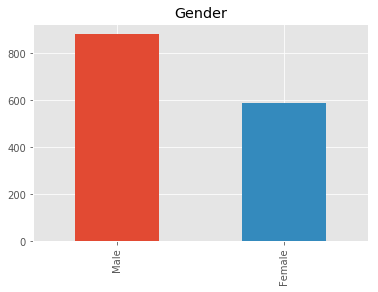

In [191]:
df['Gender'].value_counts().plot.bar(title="Gender")

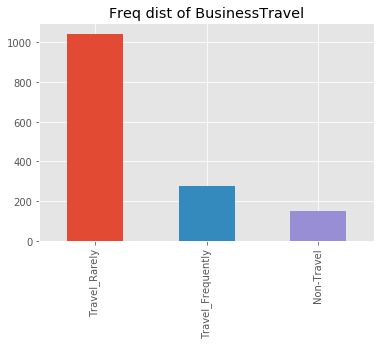

In [192]:
df['BusinessTravel'].value_counts().plot.bar(title="Freq dist of BusinessTravel")

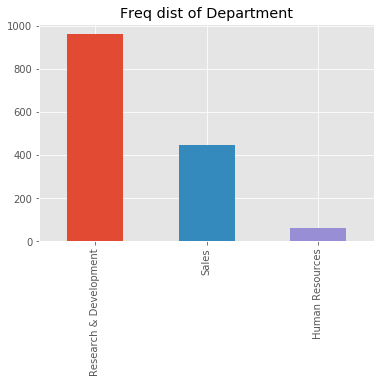

In [193]:
df['Department'].value_counts().plot.bar(title="Freq dist of Department")

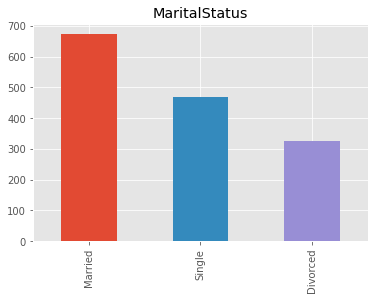

In [194]:
df['MaritalStatus'].value_counts().plot.bar(title="MaritalStatus")

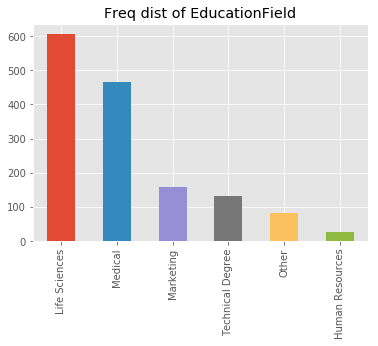

In [195]:
df['EducationField'].value_counts().plot.bar(title="Freq dist of EducationField") 

C:\Users\ADMIN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


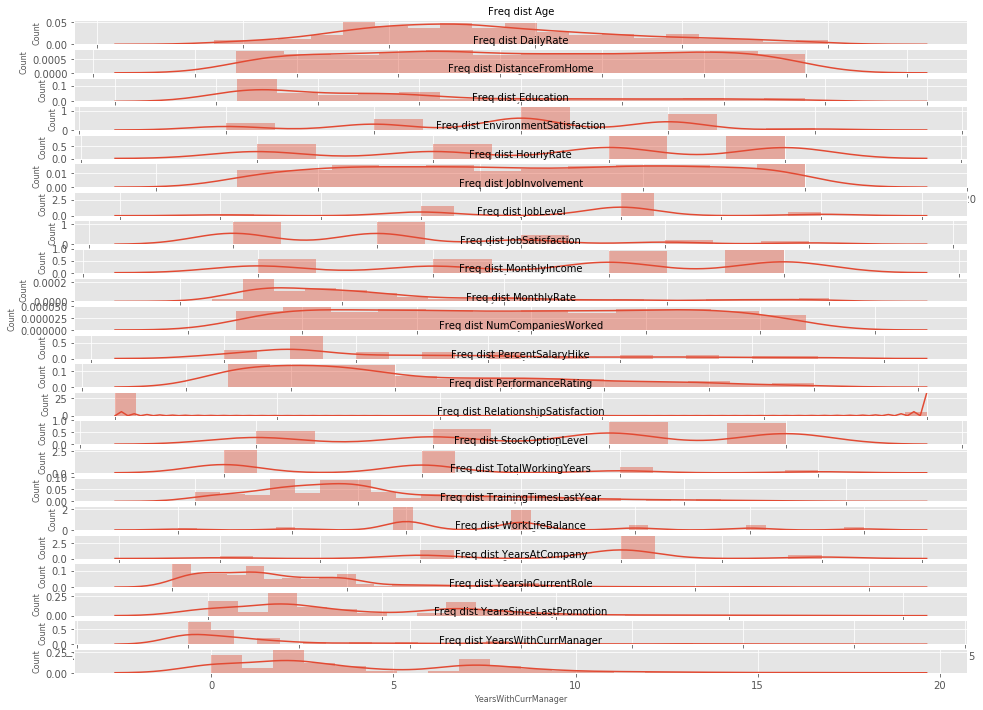

In [196]:
col_names = ["Age","DailyRate","DistanceFromHome","Education","EnvironmentSatisfaction","HourlyRate","JobInvolvement","JobLevel","JobSatisfaction","MonthlyIncome","MonthlyRate","NumCompaniesWorked","PercentSalaryHike","PerformanceRating","RelationshipSatisfaction","StockOptionLevel","TotalWorkingYears","TrainingTimesLastYear","WorkLifeBalance","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"
            ]

fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i, col_val in enumerate(col_names):
        
    sns.distplot(df[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    
plt.show()

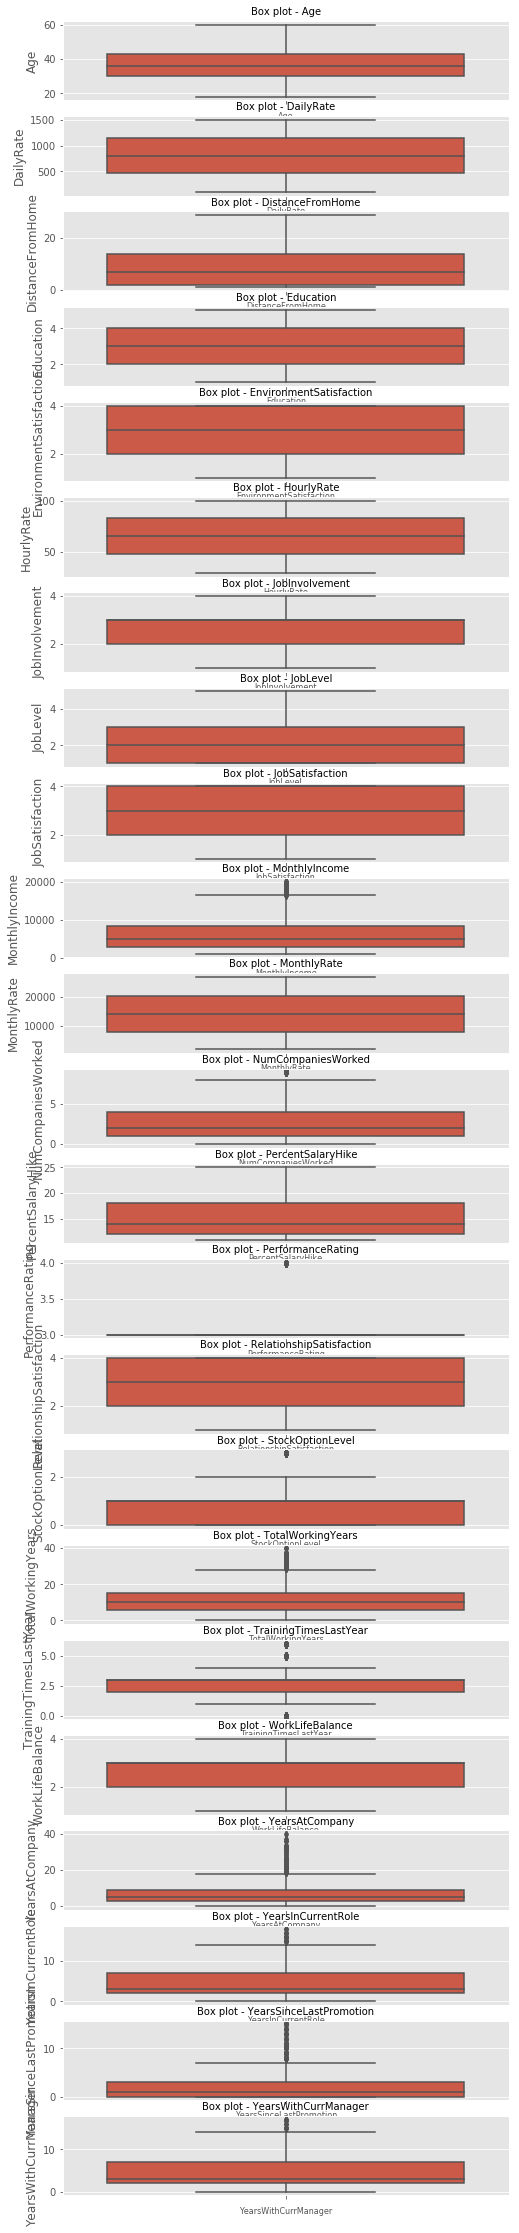

In [197]:
col_names = ["Age","DailyRate","DistanceFromHome","Education","EnvironmentSatisfaction","HourlyRate","JobInvolvement","JobLevel","JobSatisfaction","MonthlyIncome","MonthlyRate","NumCompaniesWorked","PercentSalaryHike","PerformanceRating","RelationshipSatisfaction","StockOptionLevel","TotalWorkingYears","TrainingTimesLastYear","WorkLifeBalance","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"
]
fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):
        
    sns.boxplot(y=df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    
plt.show()

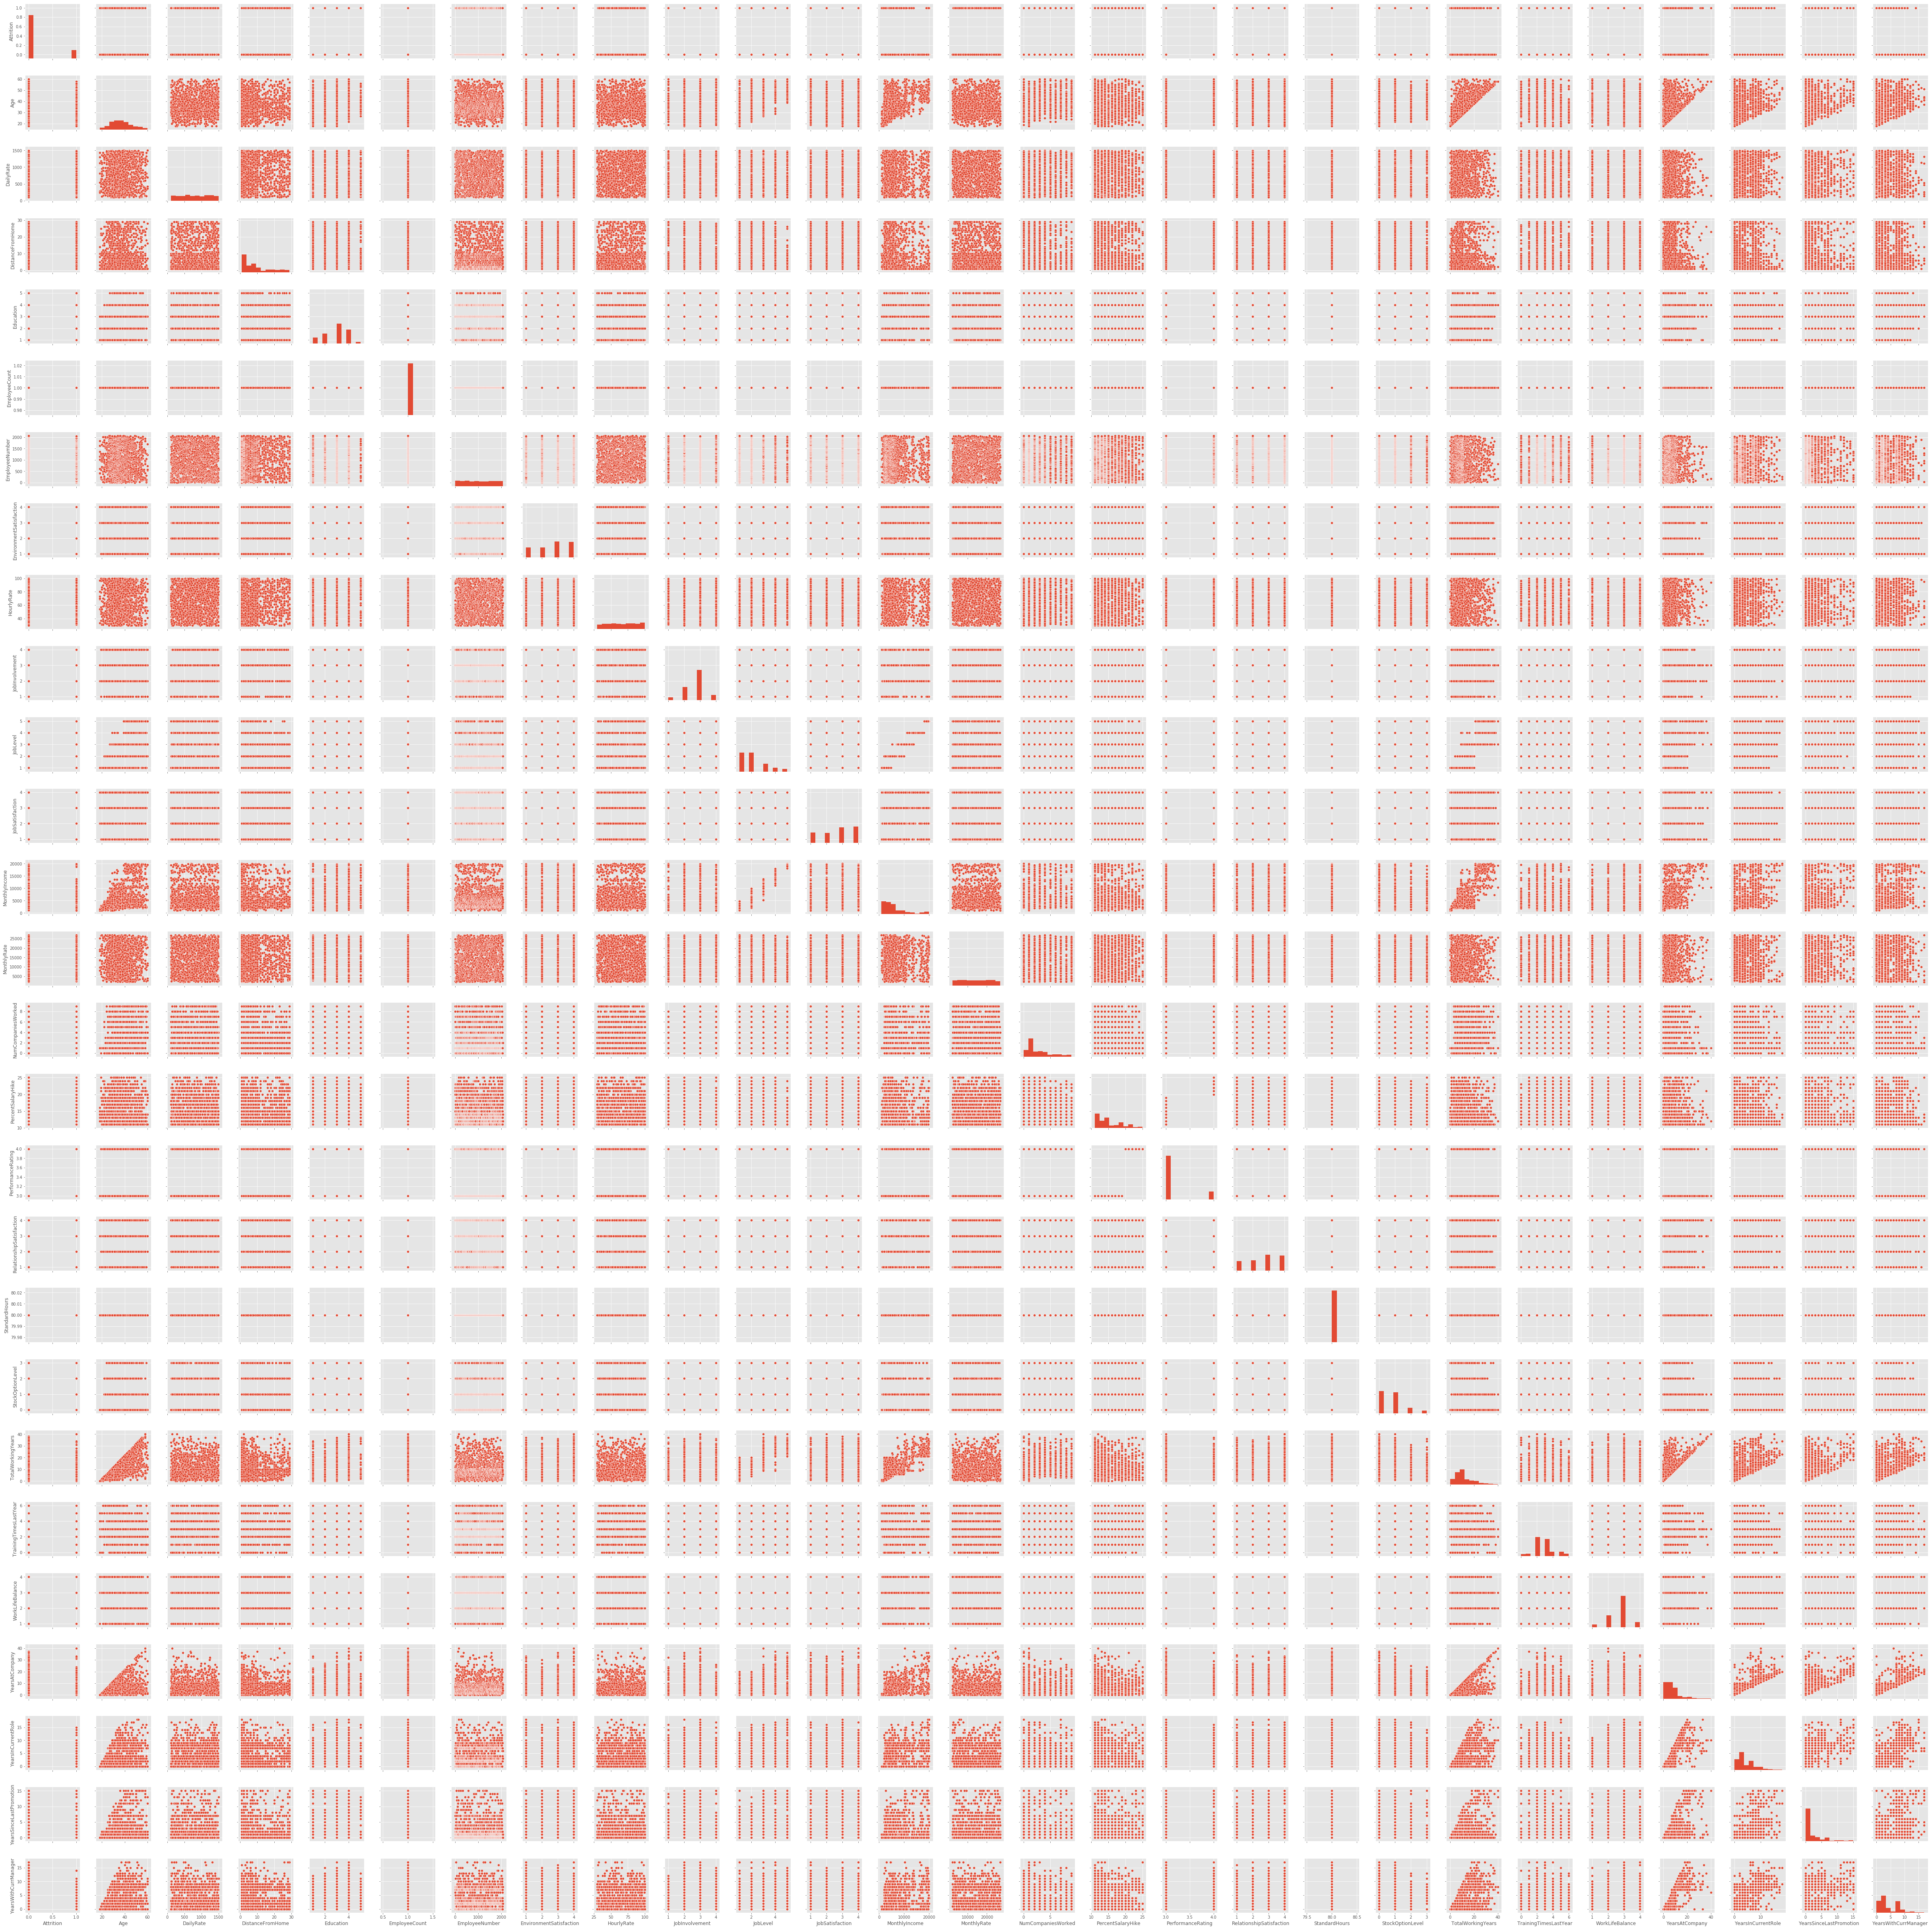

In [200]:
#df = df["Age","DailyRate","DistanceFromHome","Education","EnvironmentSatisfaction","HourlyRate","JobInvolvement","JobLevel","JobSatisfaction","MonthlyIncome","MonthlyRate","NumCompaniesWorked","PercentSalaryHike","PerformanceRating","RelationshipSatisfaction","StockOptionLevel","TotalWorkingYears","TrainingTimesLastYear","WorkLifeBalance","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"
            
sns.pairplot(df)

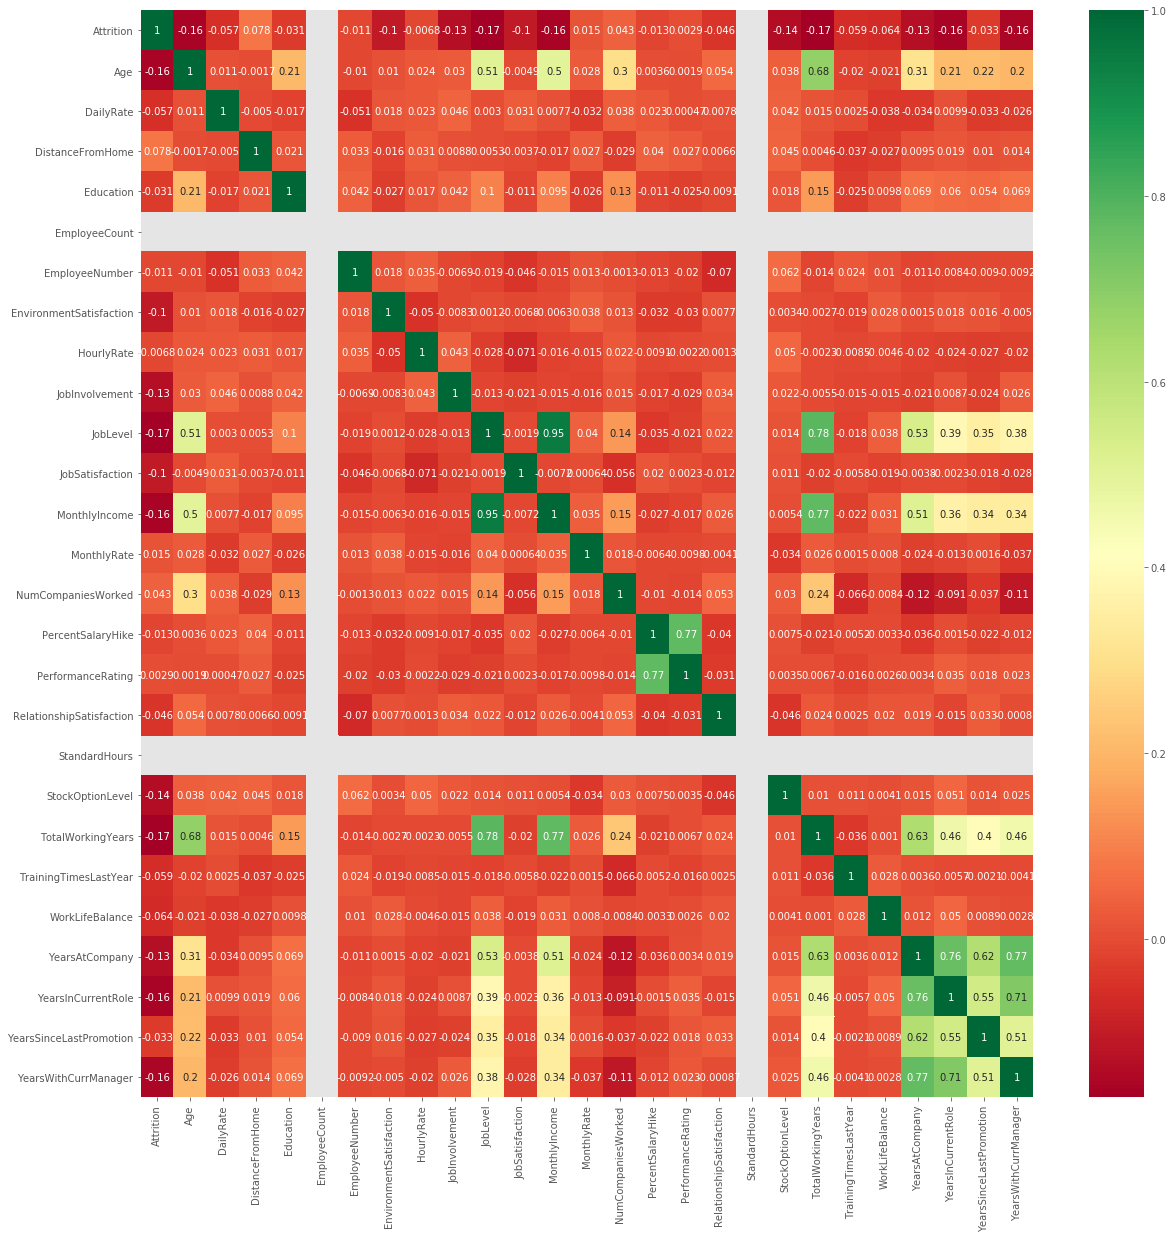

In [201]:
#f, ax = plt.subplots(figsize=(10, 8))
#corr = df_num.corr()
#sns.heatmap(corr, 
 #           xticklabels=corr.columns.values,
  #          yticklabels=corr.columns.values)
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [202]:
df.dtypes

Attrition                    int64
Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [207]:
df_num=df.select_dtypes(include=['int64'])
df_num

Attrition  Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0             1   41       1102                 1          2              1   
1             0   49        279                 8          1              1   
2             1   37       1373                 2          2              1   
3             0   33       1392                 3          4              1   
4             0   27        591                 2          1              1   
5             0   32       1005                 2          2              1   
6             0   59       1324                 3          3              1   
7             0   30       1358                24          1              1   
8             0   38        216                23          3              1   
9             0   36       1299                27          3              1   
10            0   35        809                16          3              1   
11            0   29        153                15          2              1   
12            0   31        670                26          1              1   
13            0   34       1346                19          2              1   
14            1   28        103                24          3              1   
15            0   29       1389                21          4              1   
16            0   32        334                 5          2              1   
17            0   22       1123                16          2              1   
18            0   53       1219                 2          4              1   
19            0   38        371                 2          3              1   
20            0   24        673                11          2              1   
21            1   36       1218                 9          4              1   
22            0   34        419                 7          4              1   
23            0   21        391                15          2              1   
24            1   34        699                 6          1              1   
25            0   53       1282                 5          3              1   
26            1   32       1125                16          1              1   
27            0   42        691                 8          4              1   
28            0   44        477                 7          4              1   
29            0   46        705                 2          4              1   
30            0   33        924                 2          3              1   
31            0   44       1459                10          4              1   
32            0   30        125                 9          2              1   
33            1   39        895                 5          3              1   
34            1   24        813                 1          3              1   
35            0   43       1273                 2          2              1   
36            1   50        869                 3          2              1   
37            0   35        890                 2          3              1   
38            0   36        852                 5          4              1   
39            0   33       1141                 1          3              1   
40            0   35        464                 4          2              1   
41            0   27       1240                 2          4              1   
42            1   26       1357                25          3              1   
43            0   27        994                 8          3              1   
44            0   30        721                 1          2              1   
45            1   41       1360                12          3              1   
46            0   34       1065                23          4              1   
47            0   37        408                19          2              1   
48            0   46       1211                 5          4              1   
49            0   35       1229                 8       

In [208]:
len(df.columns)

27

In [209]:
df_num.head()

Attrition  Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0          1   41       1102                 1          2              1   
1          0   49        279                 8          1              1   
2          1   37       1373                 2          2              1   
3          0   33       1392                 3          4              1   
4          0   27        591                 2          1              1   

   EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
0               1                        2          94               3   
1               2                        3          61               2   
2               4                        4          92               2   
3               5                        4          56               3   
4               7                        1          40               3   

   JobLevel  JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  \
0         2                4           5993        19479                   8   
1         2                2           5130        24907                   1   
2         1                3           2090         2396                   6   
3         1                3           2909        23159                   1   
4         1                2           3468        16632                   9   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                 11                  3                         1   
1                 23                  4                         4   
2                 15                  3                         2   
3                 11                  3                         3   
4                 12                  3                         4   

   StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0             80                 0                  8                      0   
1             80                 1                 10                      3   
2             80                 0                  7                      3   
3             80                 0                  8                      3   
4             80                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

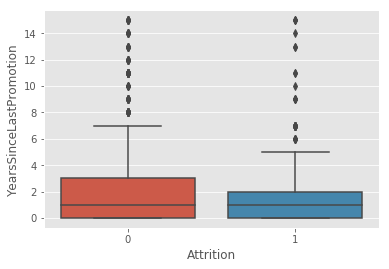

In [55]:
sns.boxplot(y=df['YearsSinceLastPromotion'],x=df['Attrition'])

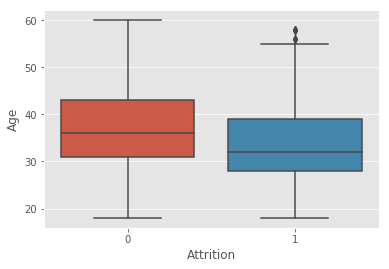

In [56]:
sns.boxplot(y=df['Age'],x=df['Attrition'])

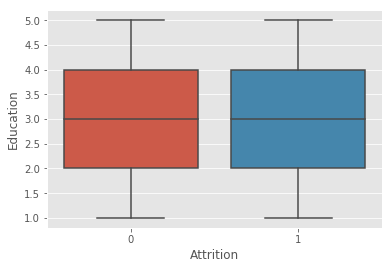

In [57]:
sns.boxplot(y=df['Education'],x=df['Attrition'])

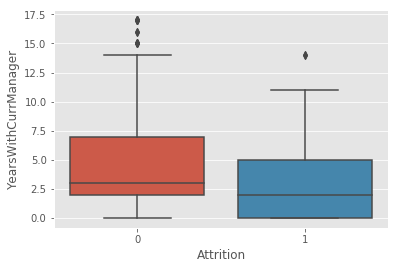

In [58]:
sns.boxplot(y=df['YearsWithCurrManager'],x=df['Attrition'])

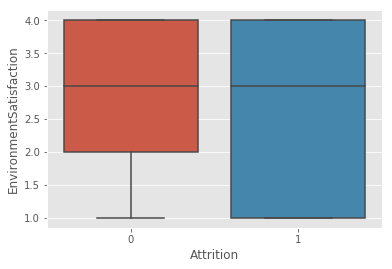

In [59]:
sns.boxplot(y=df['EnvironmentSatisfaction'],x=df['Attrition'])

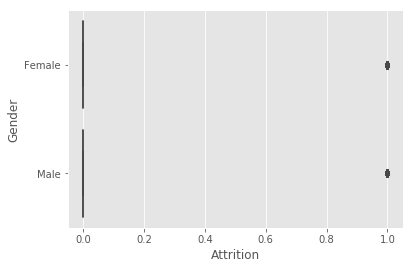

In [60]:
sns.boxplot(y=df['Gender'],x=df['Attrition'])

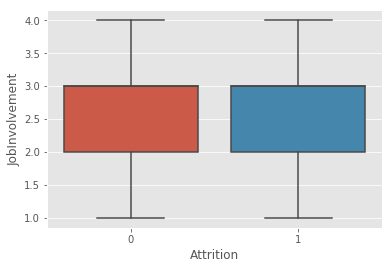

In [61]:
sns.boxplot(y=df['JobInvolvement'],x=df['Attrition'])

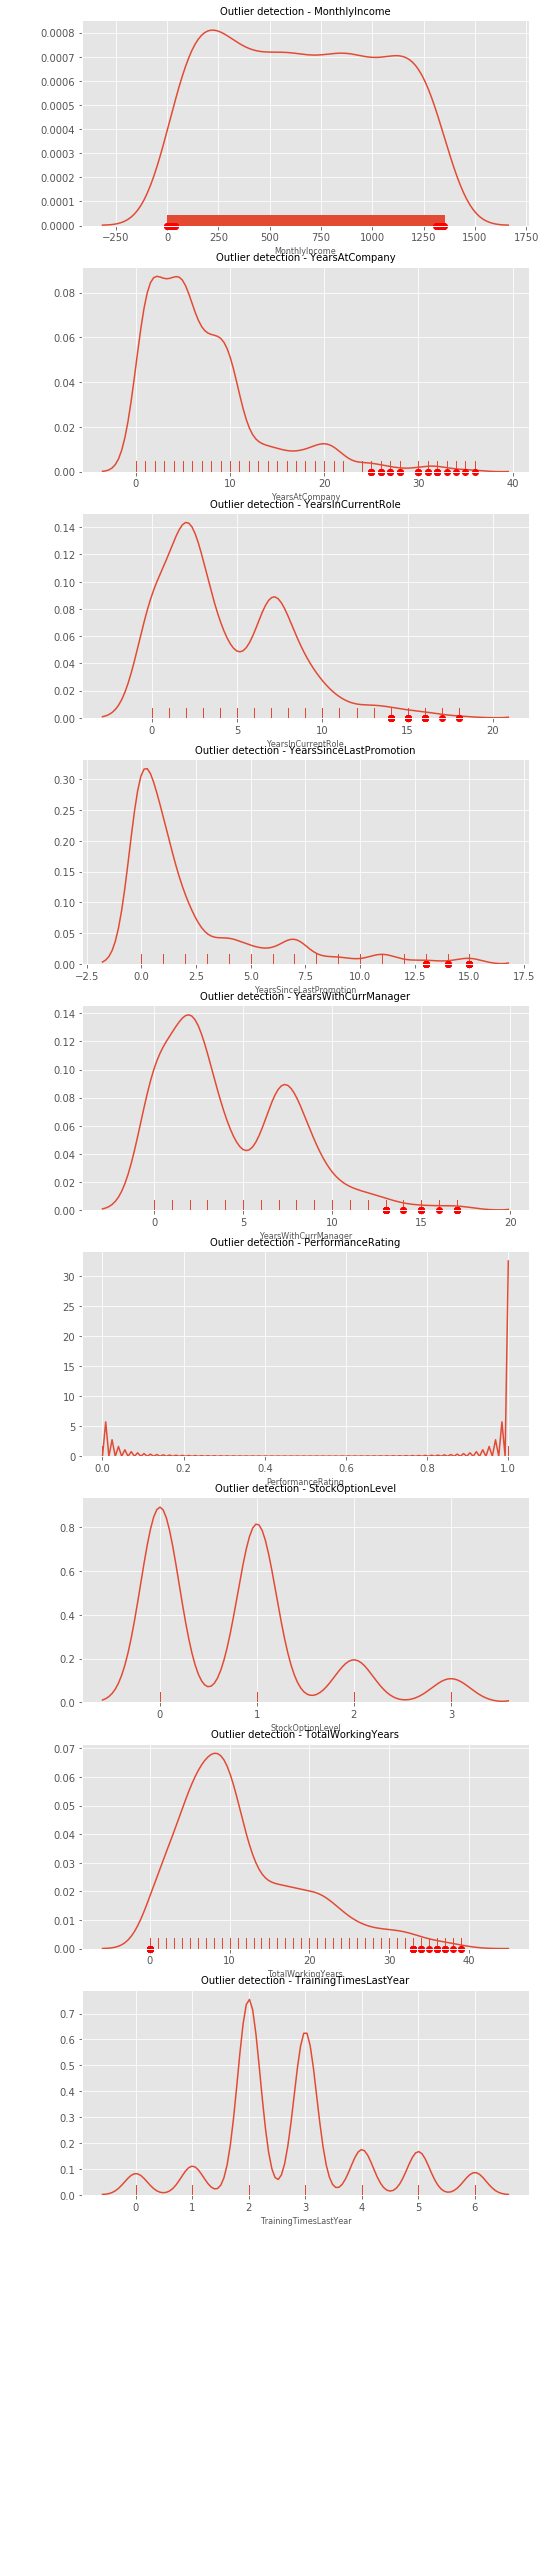

In [226]:

def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

col_names=["MonthlyIncome","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager","PerformanceRating","StockOptionLevel","TotalWorkingYears","TrainingTimesLastYear"]
            

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):
    x = df[col_val][:1000]
    sns.distplot(x, ax=ax[i], rug=True, hist=False)
    outliers = x[percentile_based_outlier(x)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    
plt.show()

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 24 columns):
Attrition                   1470 non-null int64
Age                         1470 non-null int64
DailyRate                   1470 non-null int64
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobSatisfaction             1470 non-null int64
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked          1470 non-null int64
PercentSalaryHike           1470 non-null int64
PerformanceRating           1470 non-null int64
RelationshipSatisfaction    1470 non-null int64
StockOptionLevel            1470 non-null int64
TotalWorkingYears           1470 non-null int64
TrainingTimesLastYear       1

In [228]:
# Columns to remove 
remove_col_val = ["EmployeeCount","EmployeeNumber","StandardHours"]

y = df['Attrition']

df= df.drop(remove_col_val,axis=1)
#sales_data_act = sales_data_act.drop(remove_col_val, axis=1)

# create training and testing vars


ValueError: labels ['EmployeeCount' 'EmployeeNumber' 'StandardHours'] not contained in axis

In [229]:
# Converting type to categorical variable 

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = df.apply(le.fit_transform)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 24 columns):
Attrition                   1470 non-null int64
Age                         1470 non-null int64
DailyRate                   1470 non-null int64
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobSatisfaction             1470 non-null int64
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked          1470 non-null int64
PercentSalaryHike           1470 non-null int64
PerformanceRating           1470 non-null int64
RelationshipSatisfaction    1470 non-null int64
StockOptionLevel            1470 non-null int64
TotalWorkingYears           1470 non-null int64
TrainingTimesLastYear       1

In [230]:
X = df[["Age","DailyRate","DistanceFromHome","HourlyRate","MonthlyIncome","MonthlyRate","NumCompaniesWorked","YearsInCurrentRole","TotalWorkingYears"]]
#X=df[df.columns[~df.columns.is["Attrition"])]]
Y = df[["Attrition"]]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state = 50)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(1176, 9)
(1176, 1)
(294, 9)
(294, 1)


In [108]:
# Balancing the classes using SMOTE
#from unbalanced_dataset import UnderSampler, OverSampler, SMOTE
#from imblearn.over_sampling import SMOTE
#sm = SMOTE(ratio = 1.0)
#x_train, y_train = sm.fit_sample(x_train, y_train)

#print("Class 0 numbers: " , len(y_train_res[y_train_res==0.0]))
#print("Class 1 numbers: " , len(y_train_res[y_train_res==1.0]))

In [231]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=50,criterion='entropy',max_leaf_nodes=73)
model_rfc=rfc.fit(x_train, y_train)
pred_rfc=model_rfc.predict(x_test)

C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [232]:
from sklearn.metrics import accuracy_score
print('Validation Results')
as_rfc=accuracy_score(y_test,pred_rfc)
print(as_rfc)

Validation Results
0.8197278911564626


In [219]:
from sklearn.model_selection import GridSearchCV
parameters = {"max_leaf_nodes": range(2,100,1)}


model = GridSearchCV(model_rfc,parameters,scoring="accuracy",cv=4)
model.fit(x_train,y_train)
model.best_params_


C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

{'max_leaf_nodes': 73}

In [222]:
from sklearn.metrics import confusion_matrix, classification_report
cr=classification_report(pred_rfc,y_test)
cm=confusion_matrix(pred_rfc,y_test)
print(cr)
print(cm)

             precision    recall  f1-score   support

          0       0.98      0.83      0.90       282
          1       0.11      0.50      0.18        12

avg / total       0.94      0.82      0.87       294

[[235  47]
 [  6   6]]


In [223]:
print(y_test[y_test['Attrition'] == 1]["Attrition"].count())

53


In [224]:
print(y_test[y_test['Attrition'] == 0]["Attrition"].count())

241


<BarContainer object of 9 artists>

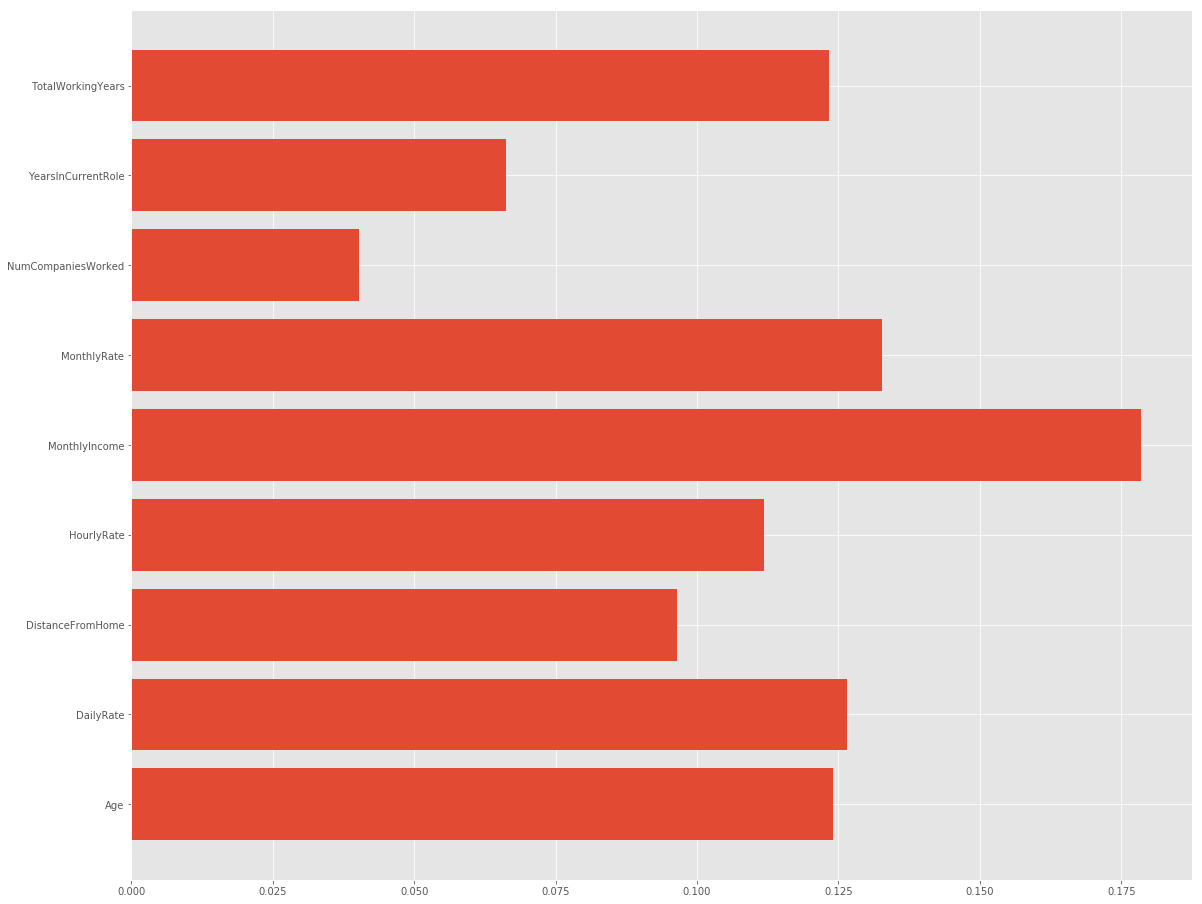

In [225]:
#import matplotlib.pyplot as p
#feature_importances = pd.DataFrame(clf_rf.feature_importances_,index = x_train.columns,columns=['importance']).sort_values('importance',ascending=False)
#p.barh(x_train.columns,model_rfr.feature_importances_)

#Columns=np.arange(len(x_train.columns))
#p.barh(Columns,model_rfr.features_importance_)feature_importances = pd.DataFrame(clf_rf.feature_importances_,index = df.columns,columns=['importance']).sort_values('importance',ascending=False)
fig=plt.figure(figsize=(19,16))
import matplotlib.pyplot as p
p.barh(x_train.columns,model_rfc.feature_importances_)